In [42]:
# utilities
import re
import pickle
import numpy as np
import pandas as pd
import snscrape.modules.twitter as sntwitter

# plotting
import seaborn as sns
#from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')


# sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

[nltk_data] Downloading package stopwords to /home/ashis-
[nltk_data]     solomon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [97]:
tweets_list = []

query = 'moonwolf departure'
start_date = '2009-11-04'
end_date = '2022-12-17'


for i,tweet in enumerate(sntwitter.TwitterSearchScraper(f'{query} since:{start_date} until:{end_date}').get_items()):
    if i>200:
        break
    if(tweet.lang == 'en' and tweet.likeCount>0):
        tweets_list.append([tweet.content, tweet.url, tweet.date, tweet.likeCount, tweet.lang])
    
cols = ['text', 'url', 'datetime', 'likeCount', 'lang']
tweets_df = pd.DataFrame(tweets_list, columns=cols)
tweets_df.sort_values(by=['likeCount'], inplace=True, ascending=False)
tweets_df.reset_index(drop=True, inplace=True)

In [98]:
tweets_df['text']

0     @pakaluthepapito Ayahuasca by Vancouver Sleep ...
1     @Cheryl07082804 @moonwolf_01 Have to apply thi...
2     @The__Sunflower_ The moonwolf Departure by Pat...
3     The Moonwolf Departure on spotify is such a so...
4     @chalamaniacc Oh moonwolf departure \nI rememb...
5     @notsovirall Man are you for real? 😂\nWait, Th...
6     The Moonwolf Departure, Pat LePoidevin entdeck...
7     Pat LePoidevin - The Moonwolf Departure https:...
8     Pat LePoidevin - The Moonwolf Departure [indie...
9     Pat LePoidevin - The Moonwolf Departure.\nhttp...
10    @oreeeyo http://t.co/4e8K4gWyJ4 The Moonwolf D...
Name: text, dtype: object

In [99]:
tweets=[]

In [100]:
for i in tweets_df['text']:
    tweets.append(i)

In [101]:
tweets

['@pakaluthepapito Ayahuasca by Vancouver Sleep Clinic\nThe Moonwolf Departure by Pat LePoidevin',
 '@Cheryl07082804 @moonwolf_01 Have to apply this week, after all our passports are renewed. Then a week or so. Departure beginning of July, need the passports to book the flight tickets.',
 '@The__Sunflower_ The moonwolf Departure by Pat LePoidevin',
 'The Moonwolf Departure on spotify is such a soothing song to listen to on a rainy day. \n#RainyDay',
 '@chalamaniacc Oh moonwolf departure \nI remember that guy',
 '@notsovirall Man are you for real? 😂\nWait, The Moonwolf Departure?',
 'The Moonwolf Departure, Pat LePoidevin entdeckt. https://t.co/bdRj4ntNYO',
 'Pat LePoidevin - The Moonwolf Departure https://t.co/KkcYHv4ILx via @YouTube',
 'Pat LePoidevin - The Moonwolf Departure [indie/folk] https://t.co/nwpSvXi0Ca #newmusic https://t.co/wTptnXd8ET',
 'Pat LePoidevin - The Moonwolf Departure.\nhttp://t.co/aphmWNTkwK',
 '@oreeeyo http://t.co/4e8K4gWyJ4 The Moonwolf Departure :)']

In [13]:
dataset=pd.read_csv("./train_data.csv")

In [14]:
dataset = dataset.sample(frac=1).reset_index(drop=True) #shuffle

In [15]:
dataset.head(50)

,sentence,sentiment
0,o day to bude still needa go shopping needa pi...,0
1,i am sad that jon amp kate splitted up i feel ...,0
2,office radio has hit an all time low heart fm ...,0
3,just listening to my guy otis redding love his...,0
4,good morning los angeles,1
5,i wish i was here for metro stations gig in ju...,0
6,just ate a spoonful of sweetened condensed mil...,0
7,i hink i do need to go to rehab lol u need to ...,1
8,i see it now,1
9,inspite of being a big enthusiast and evangeli...,0


In [16]:
dataset["sentiment"].value_counts()

0    767059
1    756916
Name: sentiment, dtype: int64

In [17]:
text, sentiment = list(dataset['sentence']), list(dataset['sentiment'])

In [44]:
# Defining dictionary containing all emojis with their meanings.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

stopwordlist = nltk.corpus.stopwords.words('english')

In [45]:
def preprocess(textdata):
    processedText = []
    
    # Create Lemmatizer and Stemmer.
    wordLemm = WordNetLemmatizer()
    
    # Defining regex patterns.
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    
    for tweet in textdata:
        tweet = tweet.lower()
        
        # Replace all URls with 'URL'
        tweet = re.sub(urlPattern,' URL',tweet)
        # Replace all emojis.
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])        
        # Replace @USERNAME to 'USER'.
        tweet = re.sub(userPattern,' USER', tweet)        
        # Replace all non alphabets.
        tweet = re.sub(alphaPattern, " ", tweet)
        # Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

        tweetwords = ''
        for word in tweet.split():
            # Checking if the word is a stopword.
            #if word not in stopwordlist:
            if len(word)>1:
                # Lemmatizing the word.
                word = wordLemm.lemmatize(word)
                tweetwords += (word+' ')
            
        processedText.append(tweetwords)
        
    return processedText

In [59]:
import time
# import nltk
# nltk.download('omw-1.4')
t = time.time()
processedtext = preprocess(text)
print(f'Text Preprocessing complete.')
print(f'Time Taken: {round(time.time()-t)} seconds')

Text Preprocessing complete.
Time Taken: 60 seconds


In [47]:
X_train, X_test, y_train, y_test = train_test_split(processedtext, sentiment,
                                                    test_size = 0.20, random_state = 42)
print(f'Data Split done.')

Data Split done.


In [48]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print(f'Vectoriser fitted.')
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

Vectoriser fitted.
No. of feature_words:  500000


/home/ashis-solomon/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### <a name="p7">Tranforming the dataset</a>
Transforming the **X_train** and **X_test** dataset into matrix of **TF-IDF Features** by using the **TF-IDF Vectoriser**. This datasets will be used to train the model and test against it.

In [28]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(f'Data Transformed.')

Data Transformed.


In [29]:
X_train

<1219180x500000 sparse matrix of type '<class 'numpy.float64'>'
	with 24546507 stored elements in Compressed Sparse Row format>

### Evaluate Model Function

In [30]:
def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.83      0.81      0.82    153553
           1       0.81      0.83      0.82    151242

    accuracy                           0.82    304795
   macro avg       0.82      0.82      0.82    304795
weighted avg       0.82      0.82      0.82    304795



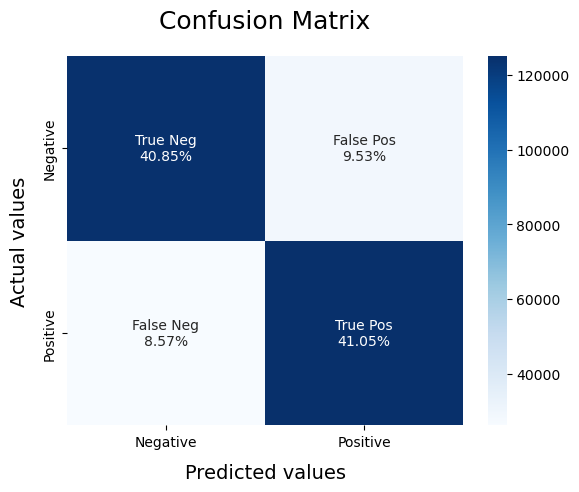

In [31]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)

In [32]:
file = open('vectoriser-ngram-(1,2).pickle','wb')
pickle.dump(vectoriser, file)
file.close()

file = open('Sentiment-LR.pickle','wb')
pickle.dump(LRmodel, file)
file.close()

#file = open('Sentiment-BNB.pickle','wb')
#pickle.dump(BNBmodel, file)
#file.close()

In [108]:
def load_models():
    
    # Load the vectoriser.
    file = open('./vectoriser-ngram-(1,2).pickle', 'rb')
    vectoriser = pickle.load(file)
    file.close()
    # Load the LR Model.
    file = open('./Sentiment-LRv1.pickle', 'rb')
    LRmodel = pickle.load(file)
    file.close()
    
    return vectoriser, LRmodel

def predict(vectoriser, model, text):
    # Predict the sentimentey
    textdata = vectoriser.transform(preprocess(text))
    sentiment = model.predict(textdata)
    
    # Make a list of text with sentiment.
    data = []
    for text, pred in zip(text, sentiment):
        data.append((text,pred))
        
    # Convert the list into a Pandas DataFrame.
    df = pd.DataFrame(data, columns = ['tweet','sentiment'])
    df = df.replace([0,1], ["Negative","Positive"])
    return df

if __name__=="__main__":
    # Loading the models.
    #vectoriser, LRmodel = load_models()
    
    # Text to classify should be in a list.
    
    
    df = predict(vectoriser, LRmodel, tweets)
    print(df.head())

                                               tweet sentiment
0  @pakaluthepapito Ayahuasca by Vancouver Sleep ...  Negative
1  @Cheryl07082804 @moonwolf_01 Have to apply thi...  Negative
2  @The__Sunflower_ The moonwolf Departure by Pat...  Negative
3  The Moonwolf Departure on spotify is such a so...  Negative
4  @chalamaniacc Oh moonwolf departure \nI rememb...  Positive


In [109]:
df.head(50)

,tweet,sentiment
0,@pakaluthepapito Ayahuasca by Vancouver Sleep ...,Negative
1,@Cheryl07082804 @moonwolf_01 Have to apply thi...,Negative
2,@The__Sunflower_ The moonwolf Departure by Pat...,Negative
3,The Moonwolf Departure on spotify is such a so...,Negative
4,@chalamaniacc Oh moonwolf departure \nI rememb...,Positive
5,"@notsovirall Man are you for real? 😂\nWait, Th...",Positive
6,"The Moonwolf Departure, Pat LePoidevin entdeck...",Negative
7,Pat LePoidevin - The Moonwolf Departure https:...,Negative
8,Pat LePoidevin - The Moonwolf Departure [indie...,Negative
9,Pat LePoidevin - The Moonwolf Departure.\nhttp...,Negative


In [110]:
a=len(df[df["sentiment"]=="Positive"])



In [111]:
b=len(df)

In [112]:
print(a/b*100)

18.181818181818183
